In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)

# In this capstone, you will build an end‑to‑end ML classification pipeline to predict client churn using:

Logistic Regression
Decision Tree
Random Forest
Hyperparameter Tuning

You will also:

    Perform EDA (univariate & bivariate)
    Handle missing values
    Encode categorical features
    Scale numerical features
    
Compare models and interpret results for the business.
Which model would you choose for production and why?

·       Consider test accuracy, F1, ROC‑AUC, and complexity.

Which features are likely driving churn?

·       Use feature importances from the tuned Random Forest.

What client segments have the highest churn?

·       Analyze by Industry, Region, Enterprise vs non‑Enterprise, etc.

What actions would you recommend?

·       Examples: targeted retention for high‑risk segments, improving SLA or CSAT, onboarding improvements for new clients, etc.

In [2]:
df = pd.read_csv('Analytics_Client_Churn_Capstone_Dataset.csv')
df.head()

,ClientID,Industry,MonthlySpend,TicketsRaised,SLACompliance,CSAT,OnboardingScore,RenewalLikelihood,AccountAgeMonths,Region,IsEnterprise,Churned
0,10001,Tech,32095.447524,6.0,77.701598,NaN,82.616311,0.625455,46,Middle East,1,1
1,10002,Manufacturing,63787.312604,5.0,77.694031,3.948368,49.195298,0.630735,6,Middle East,1,0
2,10003,Healthcare,65008.734771,7.0,87.493460,4.780609,83.739298,0.664541,20,Europe,0,0
3,10004,Manufacturing,39940.696864,3.0,80.244134,4.716022,67.691686,0.405337,19,APAC,1,0
4,10005,Manufacturing,70886.979501,8.0,95.721966,4.819236,42.026076,0.768954,14,North America,0,1


In [3]:
df.describe()

,ClientID,MonthlySpend,TicketsRaised,SLACompliance,CSAT,OnboardingScore,RenewalLikelihood,AccountAgeMonths,IsEnterprise,Churned
count,3000.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11500.500000,49670.761356,8.029474,84.925833,3.747118,69.968576,0.573287,35.533667,0.413000,0.227333
std,866.169729,14941.379157,2.784372,8.648376,0.721649,17.499863,0.215733,20.311123,0.492455,0.419180
min,10001.000000,5000.000000,0.000000,70.000166,2.501487,40.038932,0.200013,1.000000,0.000000,0.000000
25%,10750.750000,39657.241757,6.000000,77.388577,3.126652,54.876261,0.384792,18.000000,0.000000,0.000000
50%,11500.500000,49790.474660,8.000000,85.003416,3.754894,69.553483,0.566695,36.000000,0.000000,0.000000
75%,12250.250000,59784.864373,10.000000,92.267085,4.369759,85.585584,0.761725,53.000000,1.000000,0.000000
max,13000.000000,108893.565597,19.000000,99.993681,4.998172,99.993434,0.949979,71.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

ClientID               0
Industry               0
MonthlySpend         150
TicketsRaised        150
SLACompliance        150
CSAT                 150
OnboardingScore      150
RenewalLikelihood      0
AccountAgeMonths       0
Region                 0
IsEnterprise           0
Churned                0
dtype: int64

In [5]:
df['Churned'].value_counts()

0    2318
1     682
Name: Churned, dtype: int64

In [6]:
df.shape

(3000, 12)

In [7]:
Missing_na = ['MonthlySpend','TicketsRaised','SLACompliance','CSAT','OnboardingScore']
df[Missing_na] = df[Missing_na].fillna(df[Missing_na].median())

In [8]:
df.isnull().sum()

ClientID             0
Industry             0
MonthlySpend         0
TicketsRaised        0
SLACompliance        0
CSAT                 0
OnboardingScore      0
RenewalLikelihood    0
AccountAgeMonths     0
Region               0
IsEnterprise         0
Churned              0
dtype: int64

In [9]:
df=df.drop(['ClientID'], axis=1)

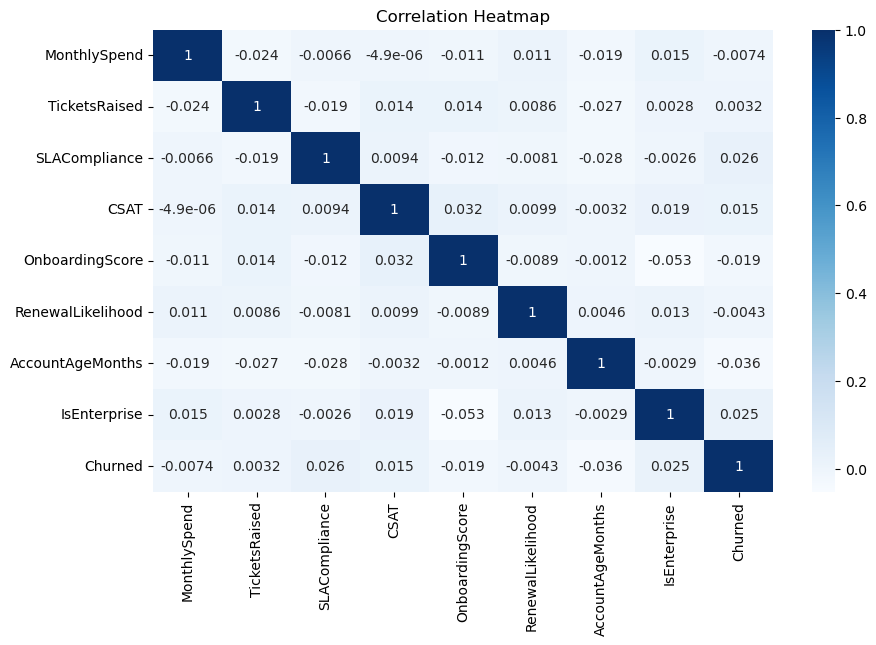

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

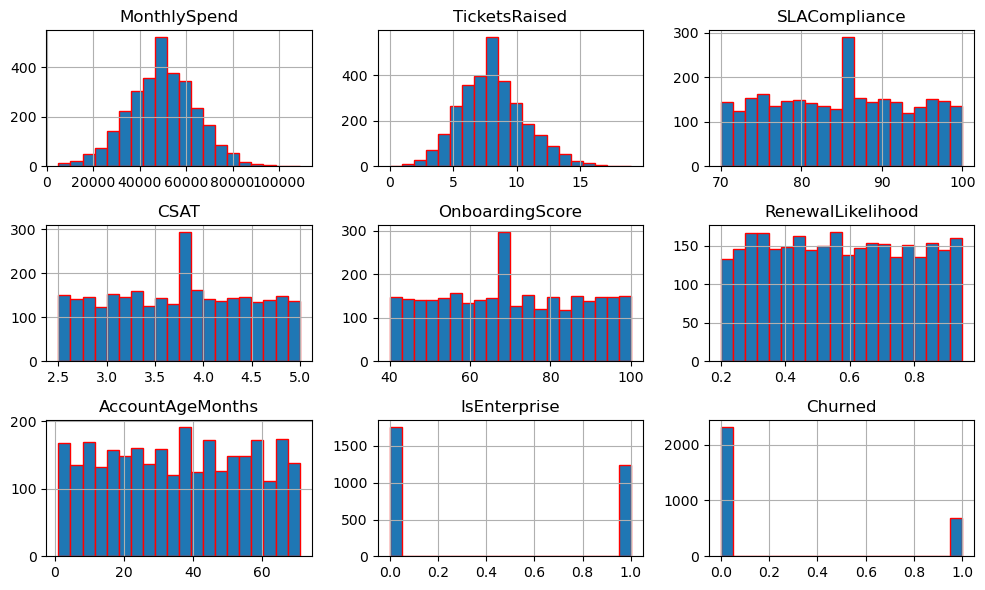

In [11]:
df.hist(figsize=(10,6), bins=20, edgecolor='Red')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Churned', ylabel='count'>

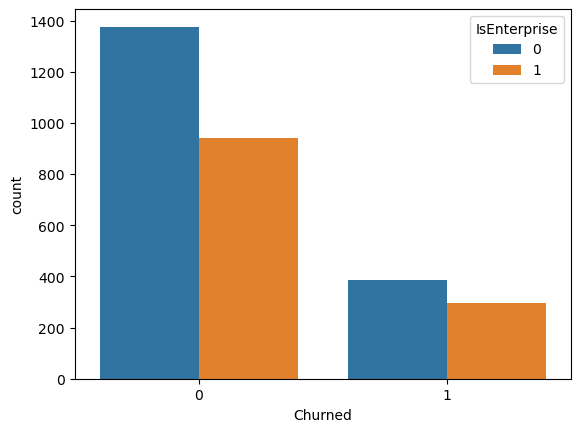

In [12]:
sns.countplot(x='Churned', hue= 'IsEnterprise', data=df)

<AxesSubplot:xlabel='Churned', ylabel='MonthlySpend'>

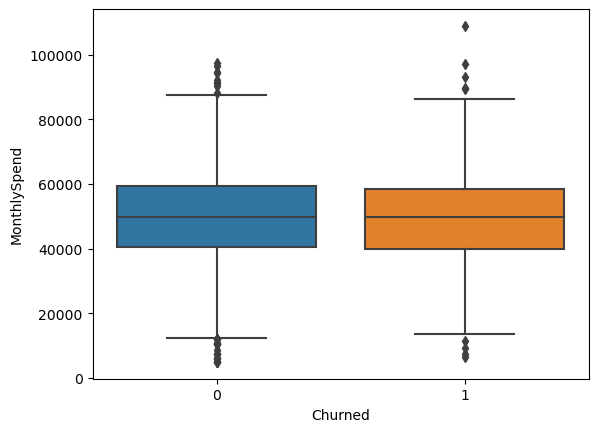

In [13]:
sns.boxplot(x='Churned', y='MonthlySpend', data=df)

<AxesSubplot:xlabel='Churned', ylabel='CSAT'>

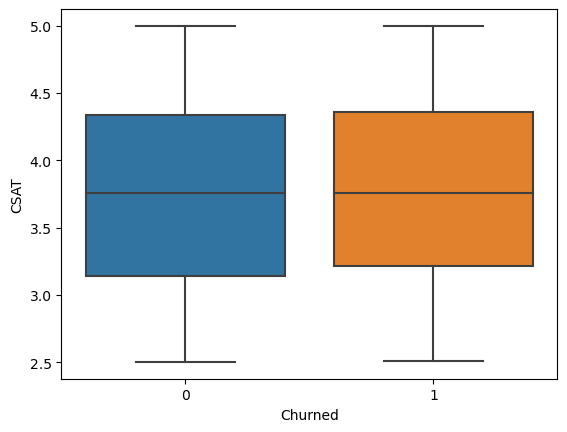

In [14]:
sns.boxplot(x='Churned', y='CSAT', data=df)

<AxesSubplot:xlabel='Churned', ylabel='TicketsRaised'>

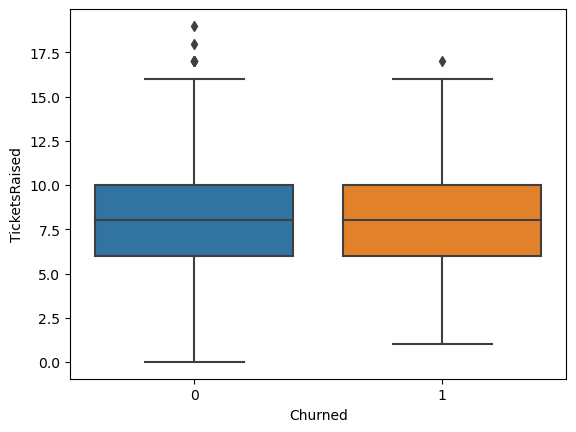

In [15]:
sns.boxplot(x='Churned', y='TicketsRaised', data=df)

<AxesSubplot:xlabel='Churned', ylabel='TicketsRaised'>

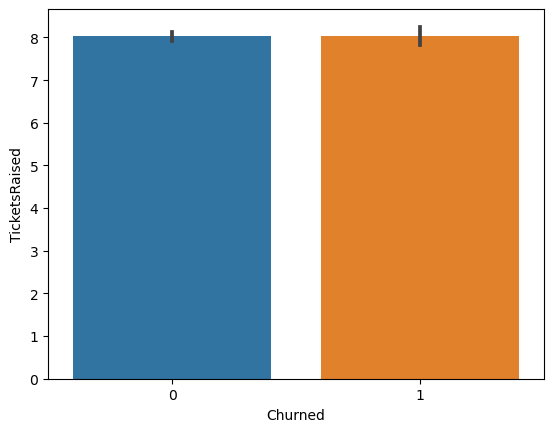

In [16]:
sns.barplot(x='Churned', y='TicketsRaised', data=df)

In [17]:
df= pd.get_dummies(df, columns=['Industry','Region'], drop_first=True)

In [18]:
X= df.drop('Churned',axis=1)
y=df['Churned']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [58]:
model = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('clf', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nBaseline model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[240 224]
 [ 70  66]]

Baseline model evaluation:
Accuracy: 0.51
Precision: 0.22758620689655173
Recall: 0.4852941176470588
F1: 0.30985915492957744
ROC AUC: 0.519459939148073

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       464
           1       0.23      0.49      0.31       136

    accuracy                           0.51       600
   macro avg       0.50      0.50      0.47       600
weighted avg       0.65      0.51      0.55       600



In [53]:
model1 = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("\nBaseline model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1:", f1_score(y_test, y_pred1))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred1))

Confusion Matrix:
 [[367  97]
 [102  34]]

Baseline model evaluation:
Accuracy: 0.6683333333333333
Precision: 0.2595419847328244
Recall: 0.25
F1: 0.2546816479400749
ROC AUC: 0.519459939148073

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       464
           1       0.26      0.25      0.25       136

    accuracy                           0.67       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.66      0.67      0.67       600



In [54]:
rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))])
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nBaseline model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1:", f1_score(y_test, y_pred2))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred2))

Confusion Matrix:
 [[462   2]
 [136   0]]

Baseline model evaluation:
Accuracy: 0.77
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.48278239097363085

Classification report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       464
           1       0.00      0.00      0.00       136

    accuracy                           0.77       600
   macro avg       0.39      0.50      0.44       600
weighted avg       0.60      0.77      0.67       600



In [55]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))])
rf.fit(X_train_sm, y_train_sm)

y_pred3 = rf.predict(X_test)
y_prob1 = rf.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("ROC AUC:", roc_auc_score(y_test, y_prob1))
print("\nClassification report:\n", classification_report(y_test, y_pred3))

Confusion Matrix:
 [[419  45]
 [126  10]]
ROC AUC: 0.5009349645030425

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       464
           1       0.18      0.07      0.10       136

    accuracy                           0.71       600
   macro avg       0.48      0.49      0.47       600
weighted avg       0.64      0.71      0.67       600



In [52]:
param_grid_rf = {
    'n_estimators': [150, 250],
    'max_depth': [8, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    scoring='f1',
    n_jobs=1,
    verbose=2
)
grid.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid.best_params_)

best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   1.7s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   1.7s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   1.7s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.9s
[CV] END class_weight=balanced, max_depth=8, min_samples_leaf=1, min_samples_s

In [56]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)

y_pred4 = rf.predict(X_test)
y_prob2 = rf.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("ROC AUC:", roc_auc_score(y_test, y_prob2))
print("\nClassification report:\n", classification_report(y_test, y_pred4))

Confusion Matrix:
 [[419  45]
 [126  10]]
ROC AUC: 0.5009349645030425

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       464
           1       0.18      0.07      0.10       136

    accuracy                           0.71       600
   macro avg       0.48      0.49      0.47       600
weighted avg       0.64      0.71      0.67       600

